In [1]:
import numpy as np
import mglearn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import eli5.sklearn
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons, load_boston, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier

warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

%matplotlib inline

/home/luskoecute/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


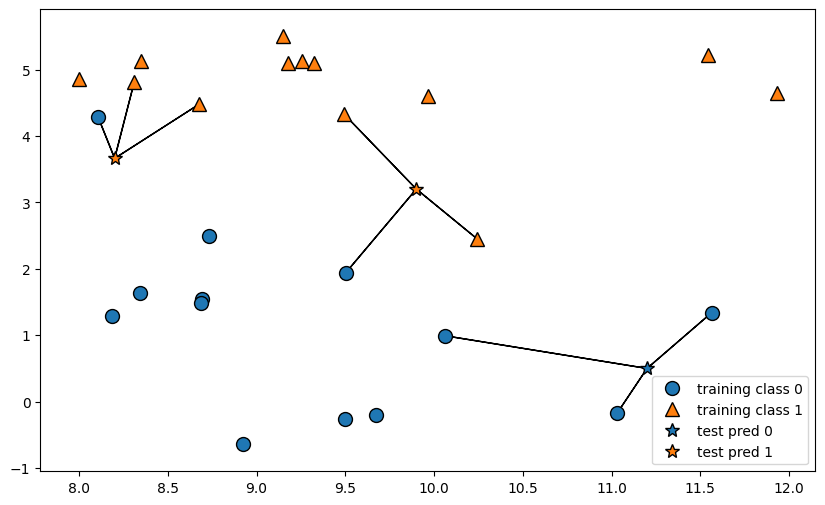

In [2]:
plt.figure(figsize=(10, 6))
mglearn.plot_knn_classification.plot_knn_classification(n_neighbors=3)

In [3]:
# k и регуляризация
# Параметърът k се явява форма на регуляризация. Колкото по-висок е, толкова "по-прост" ще бъде модела (ще открие по-проста зависимост между данните).

In [4]:
def plot_knn_parameter():
    X, y = mglearn.datasets.make_forge()

    fig, axes = plt.subplots(1, 3, figsize=(16, 5))

    for n_neighbors, ax in zip([1, 3, 9], axes):
        clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
        mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
        mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
        ax.set_title("{} neighbour(s)".format(n_neighbors))

/home/luskoecute/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


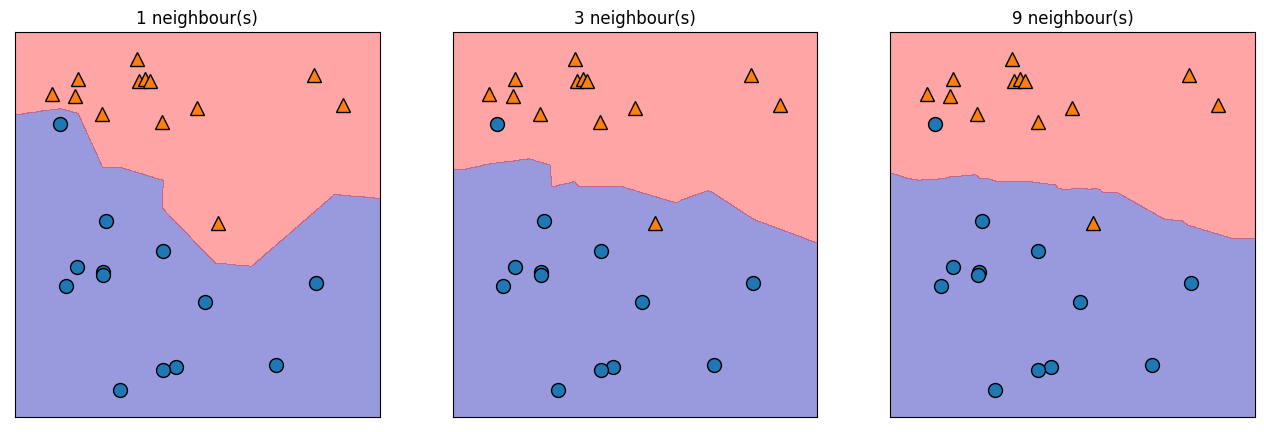

In [5]:
plot_knn_parameter()

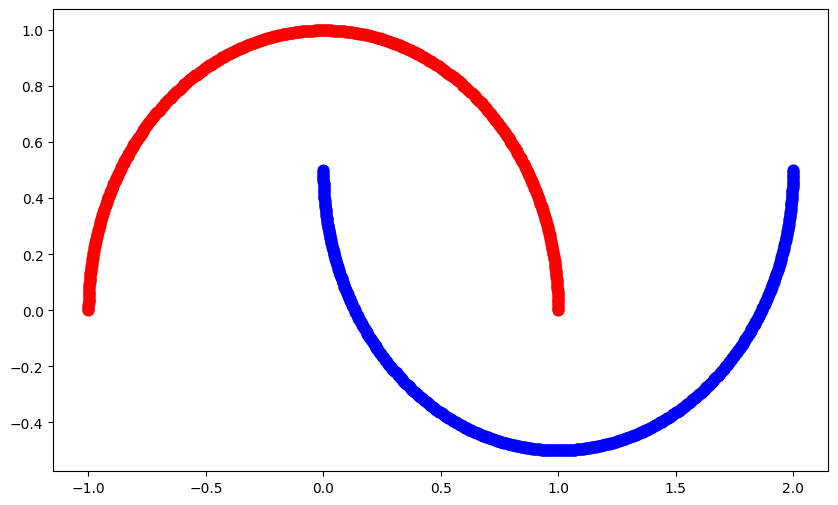

In [6]:
X, y = make_moons(1000, noise=0, random_state=0)
red = X[y == 0]
blue = X[y == 1]
plt.figure(figsize=(10, 6))
plt.scatter(red[:, 0],  red[:, 1],  color='red', alpha=1, s=60)
plt.scatter(blue[:, 0], blue[:, 1], color='blue', alpha=1, s=60);

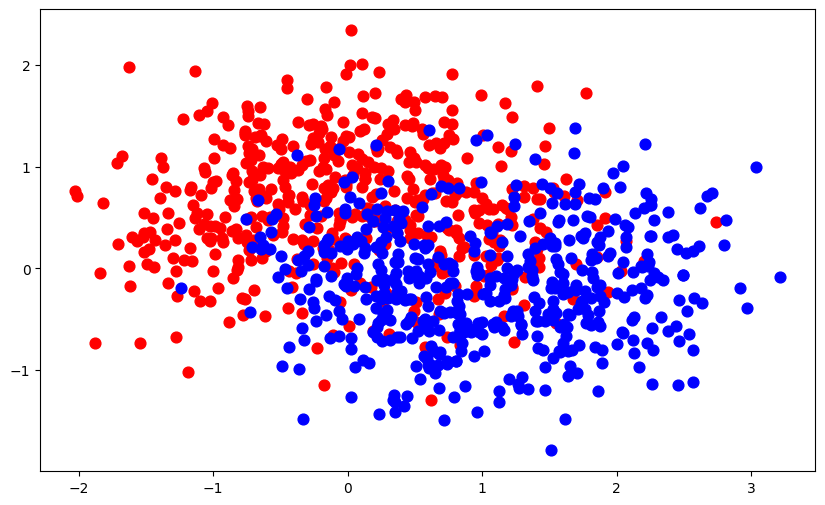

In [7]:
X, y = make_moons(1000, noise=0.5, random_state=0)
red = X[y == 0]
blue = X[y == 1]
plt.figure(figsize=(10, 6))
plt.scatter(red[:, 0],  red[:, 1],  color='red', alpha=1, s=60)
plt.scatter(blue[:, 0], blue[:, 1], color='blue', alpha=1, s=60);

In [8]:
# Нека си създадем |dataset начисто и да го разделим на тренировъчен и тестов.

X, y = make_moons(1500, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

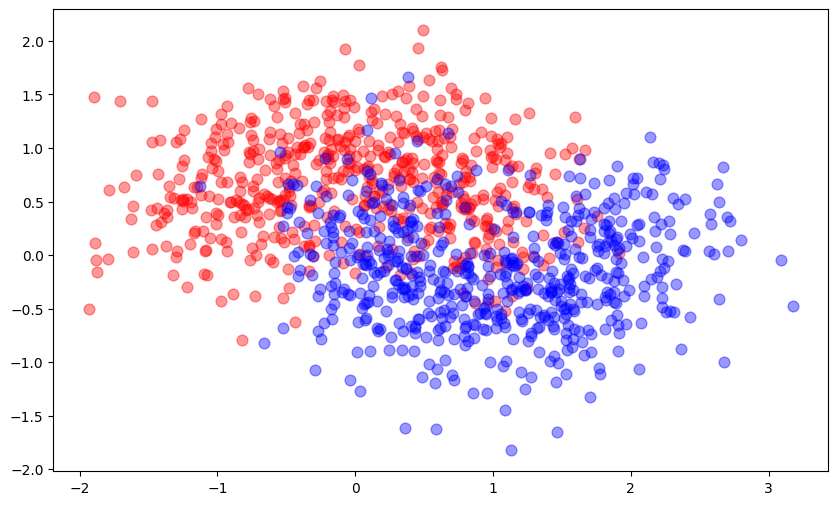

In [9]:
# Да видим как изглежда отново:

red = X_train[y_train == 0]
blue = X_train[y_train == 1]
plt.figure(figsize=(10, 6))
plt.scatter(red[:, 0],  red[:, 1],  color='red', alpha=0.4, s=60)
plt.scatter(blue[:, 0], blue[:, 1], color='blue', alpha=0.4, s=60);

In [11]:
# Нека да видим как се държи kNN с няколко различни стойности за k:

for k in [1, 7, 21, 501]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    train_score = clf.score(X_train, y_train)
    test_score  = clf.score(X_test, y_test)
    
    print("k = {:3}, train score = {:1.5f}, test score = {:1.5f}".format(k, train_score, test_score))

k =   1, train score = 1.00000, test score = 0.76800
k =   7, train score = 0.88444, test score = 0.82933
k =  21, train score = 0.87733, test score = 0.84533
k = 501, train score = 0.82844, test score = 0.81600
